In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import streamlit as st

DROPOUT ANALYSIS AND VISUALISATION

In [2]:
# Loading the dataset
india = gpd.read_file("Indian_States.txt")
df = pd.read_csv("dropout-ratio-2012-2015.csv")

# Exploring the dataset
print(df.head())
print(df.info())
print(df.describe())

# Checking for missing values
print(df.isnull().sum())

#using np.nan
df.replace("NR", np.nan, inplace=True)


# Renaming the columns
df.rename(columns={"Primary_Total": "Primary", "Upper Primary_Total": "Upper_Primary", "Secondary _Total": "Secondary", "HrSecondary_Total": "HrSecondary"}, inplace=True)

# Converting the object datatype to float
df["Primary"] = df["Primary"].astype(float)
df["Upper_Primary"] = df["Upper_Primary"].astype(float)
df["Secondary"] = df["Secondary"].astype(float)
df["HrSecondary"] = df["HrSecondary"].astype(float)

# Checking for missing values
print(df.isnull().sum())

         State_UT     year Primary_Boys Primary_Girls Primary_Total  \
0   A & N Islands  2012-13         0.83          0.51          0.68   
1   A & N Islands  2013-14         1.35          1.06          1.21   
2   A & N Islands  2014-15         0.47          0.55          0.51   
3  Andhra Pradesh  2012-13          3.3          3.05          3.18   
4  Andhra Pradesh  2013-14         4.31          4.39          4.35   

  Upper Primary_Boys Upper Primary_Girls Upper Primary_Total Secondary _Boys  \
0                 NR                1.09                1.23            5.57   
1                 NR                1.54                0.51            8.36   
2               1.44                1.95                1.69           11.47   
3               3.21                3.51                3.36           12.21   
4               3.46                4.12                3.78           11.95   

  Secondary _Girls Secondary _Total HrSecondary_Boys HrSecondary_Girls  \
0             5.55

In [3]:
st.sidebar.header('User Input')
year = st.sidebar.selectbox('Select Year', df['year'].unique().tolist())
state = st.sidebar.selectbox('Select State', df['State_UT'].unique())
print(year)

2023-12-04 14:09:58.594 
  command:

    streamlit run c:\Users\pc\miniconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


2012-13


In [4]:
df['year'].unique().tolist()

['2012-13', '2013-14', '2014-15']

In [5]:
df.head()

,State_UT,year,Primary_Boys,Primary_Girls,Primary,Upper Primary_Boys,Upper Primary_Girls,Upper_Primary,Secondary _Boys,Secondary _Girls,Secondary,HrSecondary_Boys,HrSecondary_Girls,HrSecondary
0,A & N Islands,2012-13,0.83,0.51,0.68,NaN,1.09,1.23,5.57,5.55,5.56,17.66,10.15,14.14
1,A & N Islands,2013-14,1.35,1.06,1.21,NaN,1.54,0.51,8.36,5.98,7.20,18.94,12.2,15.87
2,A & N Islands,2014-15,0.47,0.55,0.51,1.44,1.95,1.69,11.47,8.16,9.87,21.05,12.21,16.93
3,Andhra Pradesh,2012-13,3.3,3.05,3.18,3.21,3.51,3.36,12.21,13.25,12.72,2.66,NaN,0.35
4,Andhra Pradesh,2013-14,4.31,4.39,4.35,3.46,4.12,3.78,11.95,13.37,12.65,12.65,10.85,11.79


In [6]:
df_total=df[['Primary','Upper_Primary','Secondary','HrSecondary']]

In [7]:
df_total

,Primary,Upper_Primary,Secondary,HrSecondary
0,0.68,1.23,5.56,14.14
1,1.21,0.51,7.20,15.87
2,0.51,1.69,9.87,16.93
3,3.18,3.36,12.72,0.35
4,4.35,3.78,12.65,11.79
...,...,...,...,...
105,2.91,4.31,18.34,7.90
106,1.47,4.30,17.80,8.11
107,4.67,3.13,14.54,NaN
108,4.34,3.77,17.86,1.54


In [8]:
df_total.head()

,Primary,Upper_Primary,Secondary,HrSecondary
0,0.68,1.23,5.56,14.14
1,1.21,0.51,7.20,15.87
2,0.51,1.69,9.87,16.93
3,3.18,3.36,12.72,0.35
4,4.35,3.78,12.65,11.79


In [9]:
india.head()

,ID_0,ISO,NAME_0,ID_1,NAME_1,NL_NAME_1,VARNAME_1,TYPE_1,ENGTYPE_1,filename,filename_1,filename_2,filename_3,filename_4,geometry
0,105,IND,India,1,Andaman and Nicobar,,Andaman & Nicobar Islands|Andaman et Nicobar|I...,Union Territor,Union Territory,,,,,,"MULTIPOLYGON (((93.78773 6.85264, 93.78849 6.8..."
1,105,IND,India,2,Andhra Pradesh,,,State,State,,,,,,"MULTIPOLYGON (((80.27458 13.45958, 80.27458 13..."
2,105,IND,India,3,Arunachal Pradesh,,Agence de la Frontire du Nord-Est(French-obsol...,State,State,,,,,,"POLYGON ((96.15778 29.38310, 96.16380 29.37668..."
3,105,IND,India,4,Assam,,,State,State,,,,,,"MULTIPOLYGON (((89.87145 25.53730, 89.87118 25..."
4,105,IND,India,5,Bihar,,,State,State,,,,,,"MULTIPOLYGON (((88.10548 26.53904, 88.10505 26..."


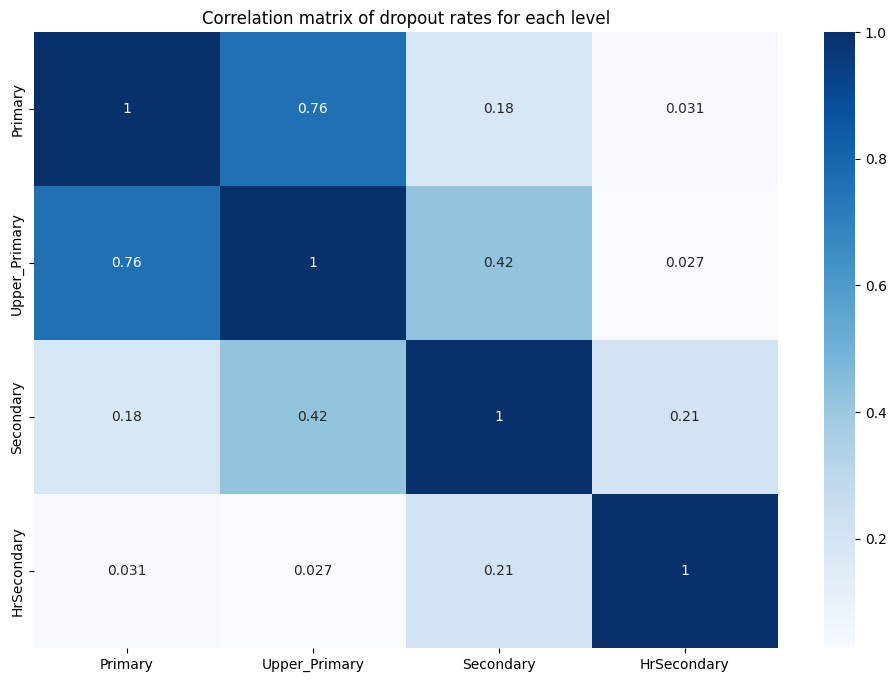

In [10]:
# Plotting the correlation matrix
plt.figure(figsize=(12,8))
sns.heatmap(df_total.corr(), annot=True, cmap="Blues",)
plt.title("Correlation matrix of dropout rates for each level")
plt.show()



In [11]:
df_total.rename(columns={"Primary": "Primary", "Upper_Primary": "Upper Primary",  "HrSecondary": "Higher Secondary"}, inplace=True)


C:\Users\pc\AppData\Local\Temp\ipykernel_13936\1662901861.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_total.rename(columns={"Primary": "Primary", "Upper_Primary": "Upper Primary",  "HrSecondary": "Higher Secondary"}, inplace=True)


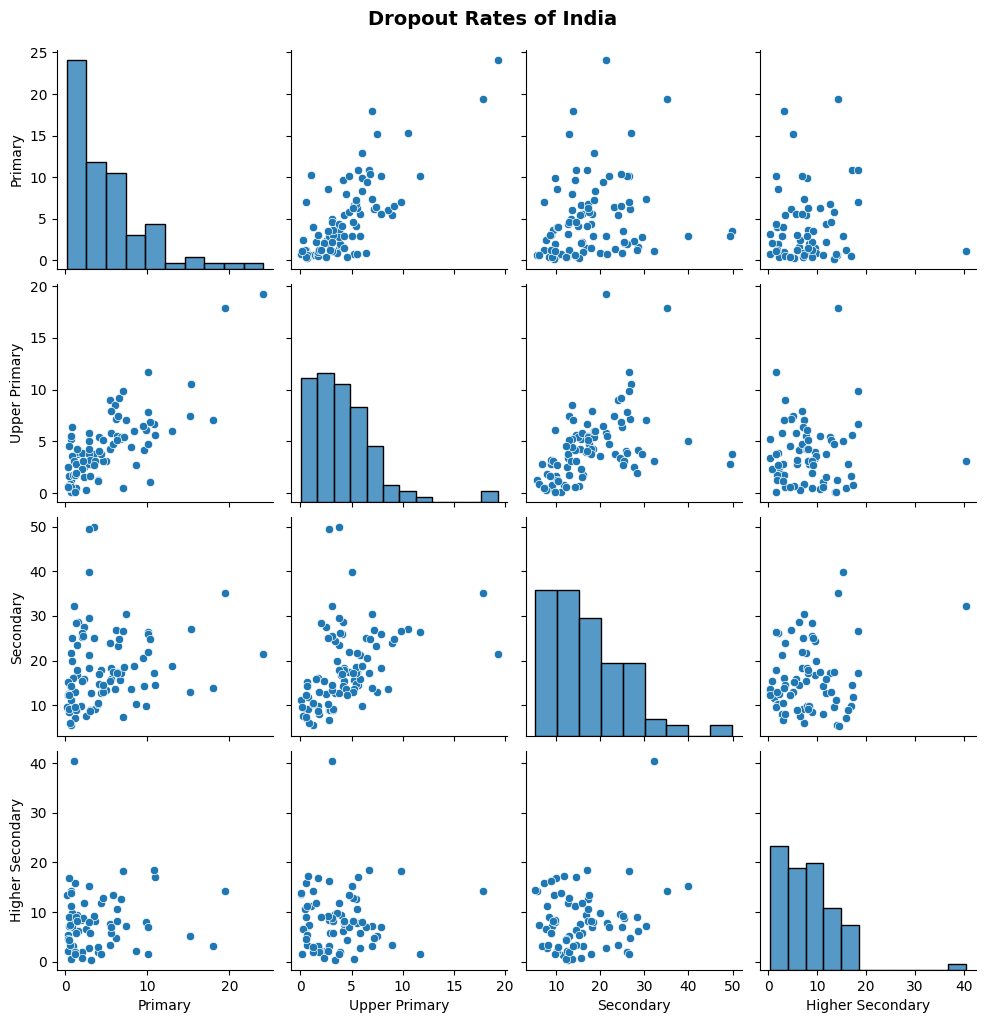

In [12]:

sns.pairplot(df_total)
plt.suptitle("Dropout Rates of India", fontsize=14, fontweight='bold', y=1.02)
plt.show()

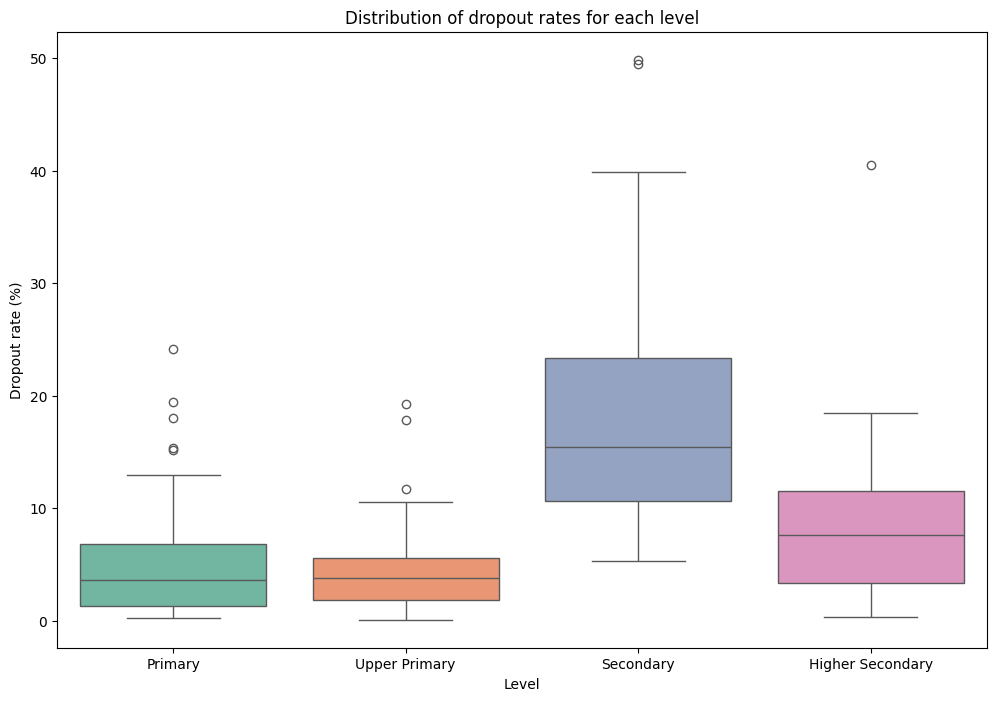

In [13]:
# Plotting the distribution of dropout rates for each level
plt.figure(figsize=(12,8))
sns.boxplot(data=df_total, palette="Set2")
plt.title("Distribution of dropout rates for each level")
plt.xlabel("Level")
plt.ylabel("Dropout rate (%)")
plt.show()

In [14]:
# Adding a new column for the average dropout rate across all levels
df["Average"] = df_total.mean(axis=1)

In [15]:
df.head()

,State_UT,year,Primary_Boys,Primary_Girls,Primary,Upper Primary_Boys,Upper Primary_Girls,Upper_Primary,Secondary _Boys,Secondary _Girls,Secondary,HrSecondary_Boys,HrSecondary_Girls,HrSecondary,Average
0,A & N Islands,2012-13,0.83,0.51,0.68,NaN,1.09,1.23,5.57,5.55,5.56,17.66,10.15,14.14,5.4025
1,A & N Islands,2013-14,1.35,1.06,1.21,NaN,1.54,0.51,8.36,5.98,7.20,18.94,12.2,15.87,6.1975
2,A & N Islands,2014-15,0.47,0.55,0.51,1.44,1.95,1.69,11.47,8.16,9.87,21.05,12.21,16.93,7.2500
3,Andhra Pradesh,2012-13,3.3,3.05,3.18,3.21,3.51,3.36,12.21,13.25,12.72,2.66,NaN,0.35,4.9025
4,Andhra Pradesh,2013-14,4.31,4.39,4.35,3.46,4.12,3.78,11.95,13.37,12.65,12.65,10.85,11.79,8.1425


In [16]:
df.head()

,State_UT,year,Primary_Boys,Primary_Girls,Primary,Upper Primary_Boys,Upper Primary_Girls,Upper_Primary,Secondary _Boys,Secondary _Girls,Secondary,HrSecondary_Boys,HrSecondary_Girls,HrSecondary,Average
0,A & N Islands,2012-13,0.83,0.51,0.68,NaN,1.09,1.23,5.57,5.55,5.56,17.66,10.15,14.14,5.4025
1,A & N Islands,2013-14,1.35,1.06,1.21,NaN,1.54,0.51,8.36,5.98,7.20,18.94,12.2,15.87,6.1975
2,A & N Islands,2014-15,0.47,0.55,0.51,1.44,1.95,1.69,11.47,8.16,9.87,21.05,12.21,16.93,7.2500
3,Andhra Pradesh,2012-13,3.3,3.05,3.18,3.21,3.51,3.36,12.21,13.25,12.72,2.66,NaN,0.35,4.9025
4,Andhra Pradesh,2013-14,4.31,4.39,4.35,3.46,4.12,3.78,11.95,13.37,12.65,12.65,10.85,11.79,8.1425


In [17]:
# Sort the dataframe by the average dropout rate in ascending order
df_sorted = df.sort_values(by="Average", ascending=True)
# Select the first five rows for the best states
df_best5 = df_sorted.head(5)
# Select the last five rows for the worst states
df_worst5 = df_sorted.tail(5)
# Concatenate the best and worst states into a new dataframe
df_comparison = pd.concat([df_best5, df_worst5])

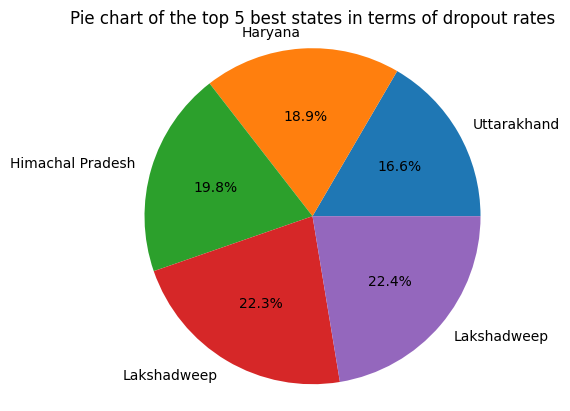

In [18]:
# Extract the data and labels for the pie chart
data = df_best5["Average"]
labels = df_best5["State_UT"]
# Create the pie chart using the plt.pie() function
plt.pie(data, labels=labels, autopct="%1.1f%%")
# Add a title for the pie chart
plt.title("Pie chart of the top 5 best states in terms of dropout rates")
# Adjust the aspect ratio of the plot
plt.axis("equal")
# Show the pie chart on the screen or save it to a file
plt.show()

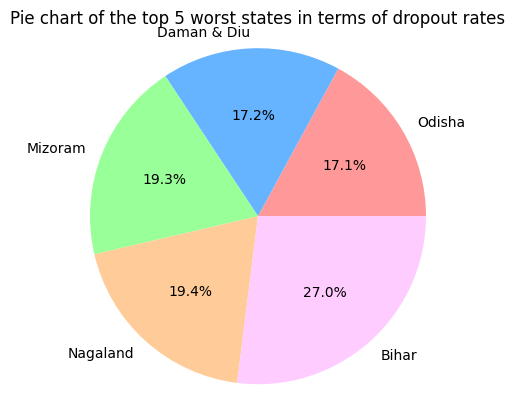

In [19]:
# Extract the data and labels for the pie chart
data = df_worst5["Average"]
labels = df_worst5["State_UT"]
# Create the pie chart using the plt.pie() function
plt.pie(data, labels=labels,autopct="%1.1f%%",colors=['#ff9999','#66b3ff','#99ff99','#ffcc99','#ffccff'] )
# Add a title for the pie chart
plt.title("Pie chart of the top 5 worst states in terms of dropout rates")
# Adjust the aspect ratio of the plot
plt.axis("equal")
# Show the pie chart on the screen or save it to a file
plt.show()

In [20]:
df.head()

,State_UT,year,Primary_Boys,Primary_Girls,Primary,Upper Primary_Boys,Upper Primary_Girls,Upper_Primary,Secondary _Boys,Secondary _Girls,Secondary,HrSecondary_Boys,HrSecondary_Girls,HrSecondary,Average
0,A & N Islands,2012-13,0.83,0.51,0.68,NaN,1.09,1.23,5.57,5.55,5.56,17.66,10.15,14.14,5.4025
1,A & N Islands,2013-14,1.35,1.06,1.21,NaN,1.54,0.51,8.36,5.98,7.20,18.94,12.2,15.87,6.1975
2,A & N Islands,2014-15,0.47,0.55,0.51,1.44,1.95,1.69,11.47,8.16,9.87,21.05,12.21,16.93,7.2500
3,Andhra Pradesh,2012-13,3.3,3.05,3.18,3.21,3.51,3.36,12.21,13.25,12.72,2.66,NaN,0.35,4.9025
4,Andhra Pradesh,2013-14,4.31,4.39,4.35,3.46,4.12,3.78,11.95,13.37,12.65,12.65,10.85,11.79,8.1425


In [21]:
df_boys=df[["Primary_Boys","Upper Primary_Boys","Secondary _Boys","HrSecondary_Boys"]]
df_girls=df[["Primary_Girls","Upper Primary_Girls","Secondary _Girls","HrSecondary_Girls"]]

In [22]:
df_boys = df_boys.apply(pd.to_numeric, errors='coerce')
df_girls=df_girls.apply(pd.to_numeric, errors='coerce')


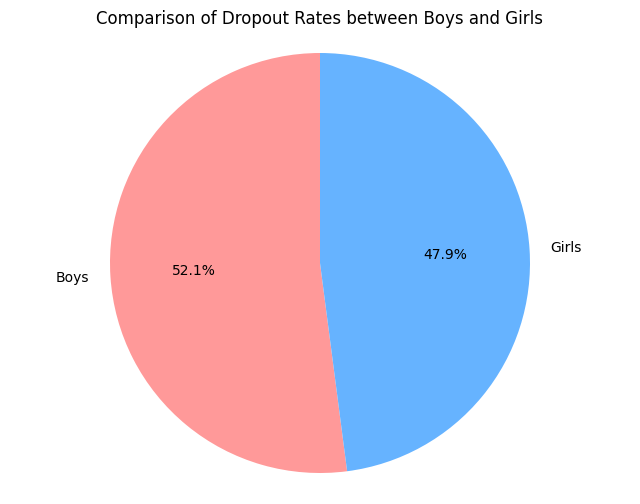

In [23]:
# Calculate the total dropout rates for boys and girls
boys_total = df_boys.sum().sum()
girls_total = df_girls.sum().sum()

# Calculate the percentage of dropout rates for boys and girls
boys_percentage = (boys_total / (boys_total + girls_total)) * 100
girls_percentage = (girls_total / (boys_total + girls_total)) * 100

# Create a pie chart to visualize the comparison
labels = ['Boys', 'Girls']
sizes = [boys_percentage, girls_percentage]
colors = ['#ff9999', '#66b3ff']


plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Comparison of Dropout Rates between Boys and Girls')
plt.show()


In [24]:
# Convert columns to numeric data types
df["year"] = pd.to_numeric(df["year"], errors="coerce")

In [25]:
# Group the dataframe by year and calculate the mean dropout rate for each level
df_grouped = df.groupby("year").mean().reset_index()

In [26]:
df.head()

,State_UT,year,Primary_Boys,Primary_Girls,Primary,Upper Primary_Boys,Upper Primary_Girls,Upper_Primary,Secondary _Boys,Secondary _Girls,Secondary,HrSecondary_Boys,HrSecondary_Girls,HrSecondary,Average
0,A & N Islands,NaN,0.83,0.51,0.68,NaN,1.09,1.23,5.57,5.55,5.56,17.66,10.15,14.14,5.4025
1,A & N Islands,NaN,1.35,1.06,1.21,NaN,1.54,0.51,8.36,5.98,7.20,18.94,12.2,15.87,6.1975
2,A & N Islands,NaN,0.47,0.55,0.51,1.44,1.95,1.69,11.47,8.16,9.87,21.05,12.21,16.93,7.2500
3,Andhra Pradesh,NaN,3.3,3.05,3.18,3.21,3.51,3.36,12.21,13.25,12.72,2.66,NaN,0.35,4.9025
4,Andhra Pradesh,NaN,4.31,4.39,4.35,3.46,4.12,3.78,11.95,13.37,12.65,12.65,10.85,11.79,8.1425


In [27]:
india.head()

,ID_0,ISO,NAME_0,ID_1,NAME_1,NL_NAME_1,VARNAME_1,TYPE_1,ENGTYPE_1,filename,filename_1,filename_2,filename_3,filename_4,geometry
0,105,IND,India,1,Andaman and Nicobar,,Andaman & Nicobar Islands|Andaman et Nicobar|I...,Union Territor,Union Territory,,,,,,"MULTIPOLYGON (((93.78773 6.85264, 93.78849 6.8..."
1,105,IND,India,2,Andhra Pradesh,,,State,State,,,,,,"MULTIPOLYGON (((80.27458 13.45958, 80.27458 13..."
2,105,IND,India,3,Arunachal Pradesh,,Agence de la Frontire du Nord-Est(French-obsol...,State,State,,,,,,"POLYGON ((96.15778 29.38310, 96.16380 29.37668..."
3,105,IND,India,4,Assam,,,State,State,,,,,,"MULTIPOLYGON (((89.87145 25.53730, 89.87118 25..."
4,105,IND,India,5,Bihar,,,State,State,,,,,,"MULTIPOLYGON (((88.10548 26.53904, 88.10505 26..."


In [28]:
# Merge the two DataFrames on the common column that contains the state names
merged = pd.merge(india, df, left_on="NAME_1", right_on="State_UT", how="inner")

In [29]:
df.head()

,State_UT,year,Primary_Boys,Primary_Girls,Primary,Upper Primary_Boys,Upper Primary_Girls,Upper_Primary,Secondary _Boys,Secondary _Girls,Secondary,HrSecondary_Boys,HrSecondary_Girls,HrSecondary,Average
0,A & N Islands,NaN,0.83,0.51,0.68,NaN,1.09,1.23,5.57,5.55,5.56,17.66,10.15,14.14,5.4025
1,A & N Islands,NaN,1.35,1.06,1.21,NaN,1.54,0.51,8.36,5.98,7.20,18.94,12.2,15.87,6.1975
2,A & N Islands,NaN,0.47,0.55,0.51,1.44,1.95,1.69,11.47,8.16,9.87,21.05,12.21,16.93,7.2500
3,Andhra Pradesh,NaN,3.3,3.05,3.18,3.21,3.51,3.36,12.21,13.25,12.72,2.66,NaN,0.35,4.9025
4,Andhra Pradesh,NaN,4.31,4.39,4.35,3.46,4.12,3.78,11.95,13.37,12.65,12.65,10.85,11.79,8.1425


In [30]:
# Remove Chandigarh from the GeoDataFrame
merged =merged[merged['NAME_1'] != 'Chandigarh']

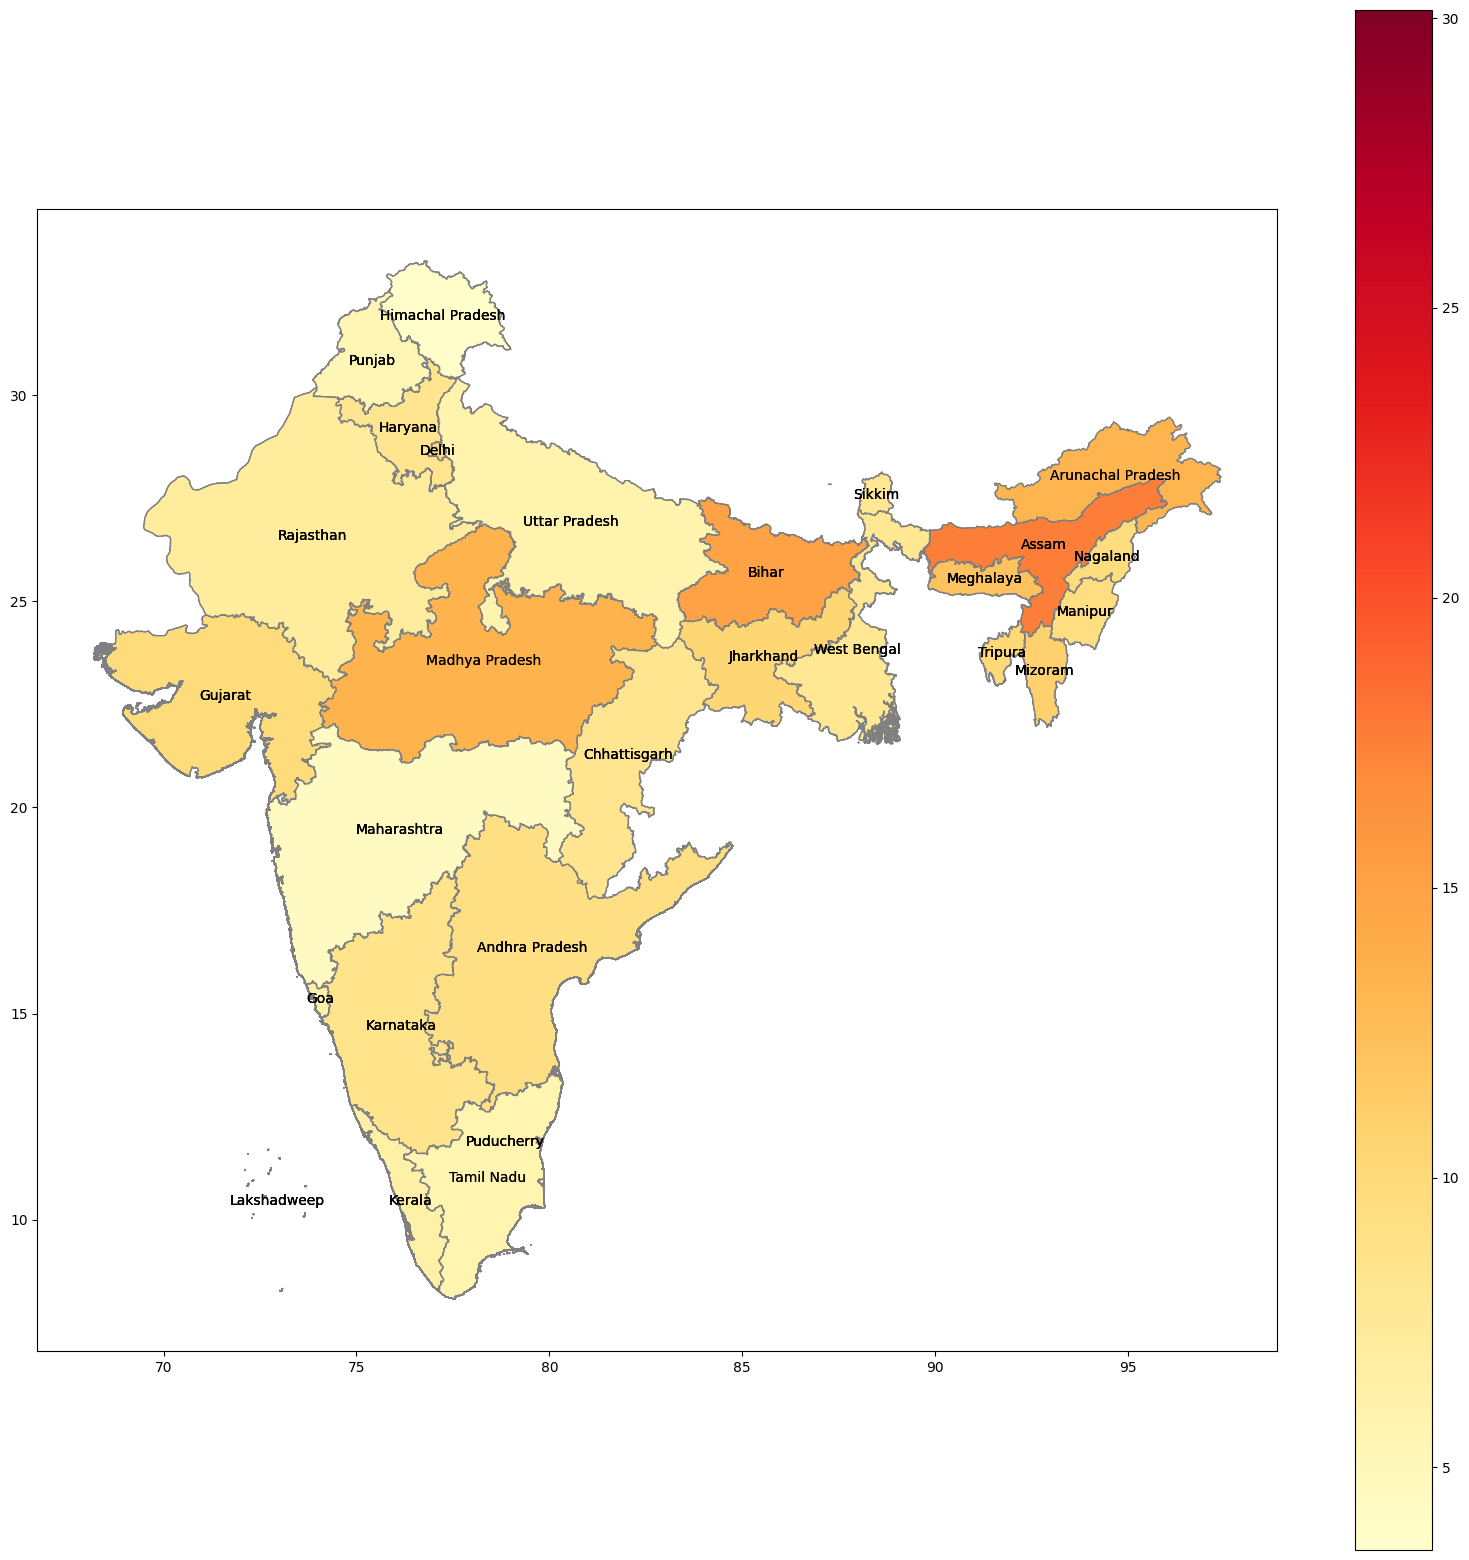

In [31]:

fig, ax = plt.subplots(1, 1, figsize=(20, 20))  # Increase the figsize to increase the size of the map
merged.plot(column='Average', cmap='YlOrRd', linewidth=1, ax=ax, edgecolor='0.5', legend=True)

# Annotate each state with its name at the center
for idx, row in merged.iterrows():
    centroid_x, centroid_y = row['geometry'].centroid.x, row['geometry'].centroid.y
    state_name = row['NAME_1']
    ax.text(centroid_x, centroid_y, state_name, fontsize=10, ha='center', va='center')


ENROLLMENT ANALYSIS AND VISUALISATION

In [32]:
df_enroll = pd.read_csv('gross-enrollment-ratio-2013-2016.csv')
df_enroll.sort_values(by='Year',inplace=True)

In [33]:
df_enroll['State_UT'].replace({
    'MADHYA PRADESH':'Madhya Pradesh',
    'Pondicherry':'Puducherry',
    'Uttaranchal':'Uttar Pradesh'
},inplace=True)

In [34]:
filt1 = (df_enroll['State_UT'] =='All India')

In [35]:
filt1.head()    

0     False
20    False
21    False
22    False
23    False
Name: State_UT, dtype: bool

In [36]:
df_gre_total = df_enroll.loc[filt1]
boys_col = ['Primary_Boys','Upper_Primary_Boys','Secondary_Boys','Higher_Secondary_Boys']
girls_col = ['Primary_Girls','Upper_Primary_Girls','Secondary_Girls','Higher_Secondary_Girls']

In [37]:
df_gre_total.loc[:,'Higher_Secondary_Boys']=df_gre_total.loc[:,'Higher_Secondary_Boys'].astype('float')
df_gre_total.loc[:,'Higher_Secondary_Girls']=df_gre_total.loc[:,'Higher_Secondary_Girls'].astype('float')

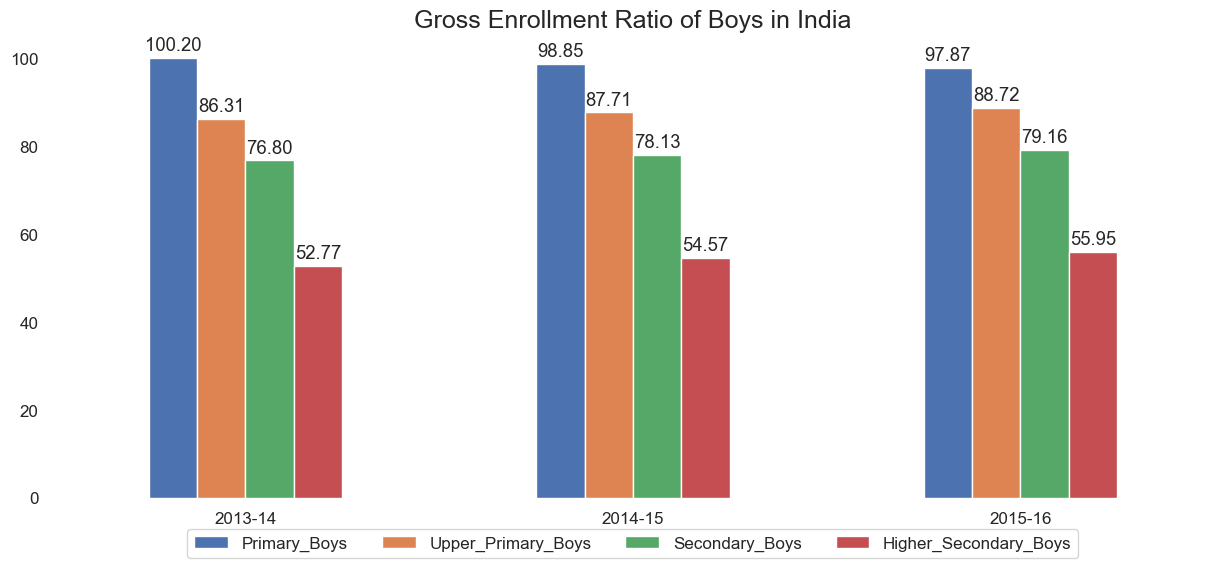

In [38]:
sns.set(font_scale = 1.11)
sns.set_style("white")
ax = df_gre_total[boys_col].plot.bar(figsize=(15,6))
sns.despine(left=True, bottom=True)

ax.set_xticklabels(np.arange(3))
ax.set_title('Gross Enrollment Ratio of Boys in India',size=18)
ax.set_xticklabels(list(df_gre_total['Year']))
for tick in ax.get_xticklabels():
    tick.set_rotation(-0)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),ncol=4)

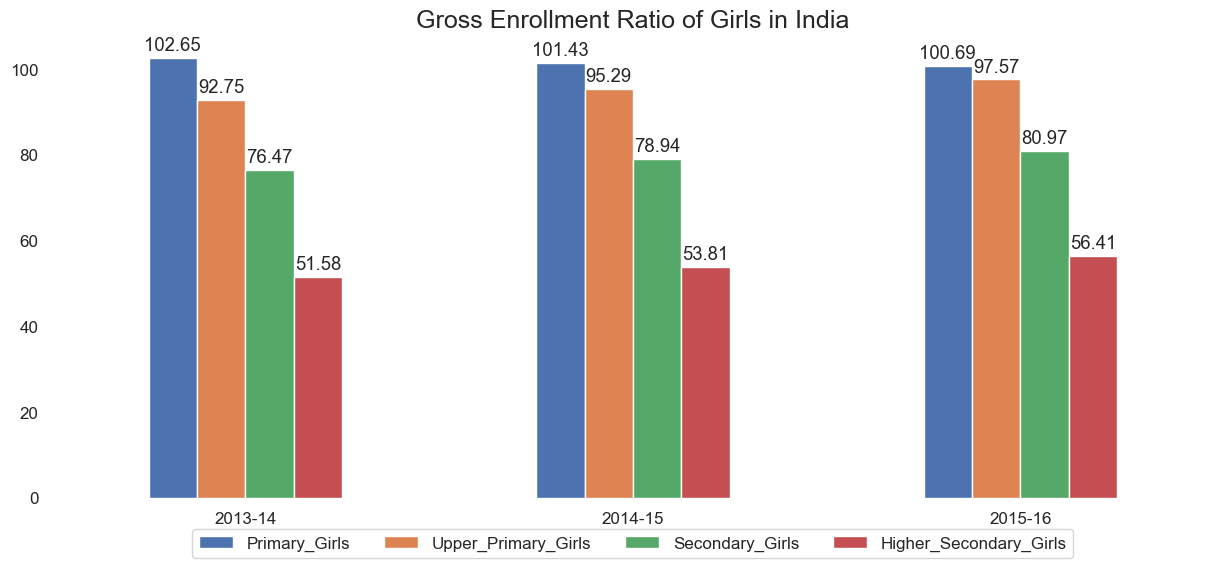

In [39]:
sns.set(font_scale = 1.11)
sns.set_style("white")
ax = df_gre_total[girls_col].plot.bar(figsize=(15,6))
sns.despine(left=True, bottom=True)

ax.set_xticklabels(np.arange(3))
ax.set_title('Gross Enrollment Ratio of Girls in India',size=18)
ax.set_xticklabels(list(df_gre_total['Year']))
for tick in ax.get_xticklabels():
    tick.set_rotation(-0)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),ncol=4)

In [40]:
filt_year = df_enroll['Year'] =='2015-16'
df_enroll_latest = df_enroll[filt_year]
df_enroll_latest.sort_values(by='Higher_Secondary_Total',ascending=False,inplace=True)
df_enroll_latest['Higher_Secondary_Total'] = df_enroll_latest['Higher_Secondary_Total'].astype('float')

C:\Users\pc\AppData\Local\Temp\ipykernel_13936\3829983512.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_enroll_latest.sort_values(by='Higher_Secondary_Total',ascending=False,inplace=True)
C:\Users\pc\AppData\Local\Temp\ipykernel_13936\3829983512.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_enroll_latest['Higher_Secondary_Total'] = df_enroll_latest['Higher_Secondary_Total'].astype('float')


C:\Users\pc\AppData\Local\Temp\ipykernel_13936\1263685416.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="State_UT", y="Primary_Total",palette='Purples_r',


Text(0.5, 0.98, 'Sates with highest GER in Primary')

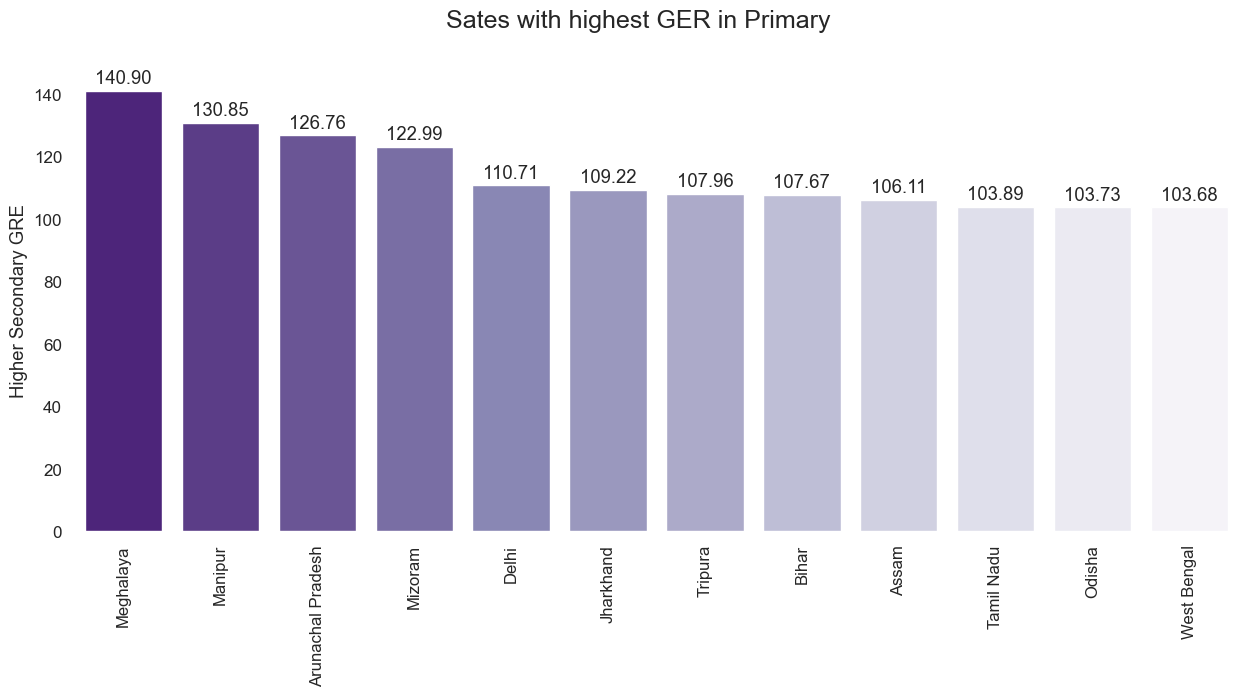

In [41]:
fig,ax = plt.subplots(figsize=(15,6))
sns.set_style("white")
ax = sns.barplot(x="State_UT", y="Primary_Total",palette='Purples_r',
                 data=df_enroll_latest.sort_values(by='Primary_Total',ascending=False).head(12))
sns.despine(left=True, bottom=True)


for item in ax.get_xticklabels():
    item.set_rotation(90)
    item.set_fontsize(12)
ax.set_xlabel('')
ax.set_ylabel('Higher Secondary GRE')


for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')


fig.suptitle('Sates with highest GER in Primary', fontsize=18)

Plots of all states in detail

In [42]:
def plot_state(state):    
    filt_state = (df_enroll['State_UT'] == state)
    df_gre_total = df_enroll.loc[filt_state]
   
    df_gre_total.loc[:,'Higher_Secondary_Boys']=df_gre_total.loc[:,'Higher_Secondary_Boys'].astype('float')
    df_gre_total.loc[:,'Higher_Secondary_Girls']=df_gre_total.loc[:,'Higher_Secondary_Girls'].astype('float')
    sns.set(font_scale = 1.111)
   
    
    sns.set_style("white")
    fig= plt.figure(figsize=(18,12))
    
    
    ax1 = fig.add_subplot(211)
   
    ax2 = fig.add_subplot(212)
    df_gre_total[boys_col].plot.bar(ax=ax1)
    df_gre_total[girls_col].plot.bar(ax=ax2)
    sns.despine(left=True, bottom=True)
    
    
    ax1.set_xticklabels(np.arange(3))
    ax1.set_title('Gross Enrolment Ratio of Boys',size=15)
    ax1.set_xticklabels(list(df_gre_total['Year']))
    for tick in ax1.get_xticklabels():
        tick.set_rotation(-0)
    fig.suptitle(f'{state}', fontsize=18)
    
    ax2.set_xticklabels(np.arange(3))
    ax2.set_title('Gross Enrolment Ratio of Girls',size=15)
    ax2.set_xticklabels(list(df_gre_total['Year']))
    for tick in ax2.get_xticklabels():
        tick.set_rotation(-0)

    for p in ax1.patches:
        ax1.annotate(format(p.get_height(), '.2f'), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       xytext = (0, 9), 
                       textcoords = 'offset points')
    
    for p in ax2.patches:
        ax2.annotate(format(p.get_height(), '.2f'), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       xytext = (0, 9), 
                       textcoords = 'offset points')
        
        
    ax1.get_legend().remove()
    
    import matplotlib.patches as mpatches
    
    primary_patch = mpatches.Patch(color='#29629e', label='Primary')
    upper_primary_patch = mpatches.Patch(color='#ff6d05', label='Upper Primary')
    secondary_patch = mpatches.Patch(color='#226908', label='Secondary')
    higher_secondary_patch = mpatches.Patch(color='#8a1111', label='Higher Secondary')    
    ax2.legend(handles=[primary_patch, upper_primary_patch,secondary_patch,higher_secondary_patch],
               loc='upper center', bbox_to_anchor=(0.5, -0.05),ncol=4)

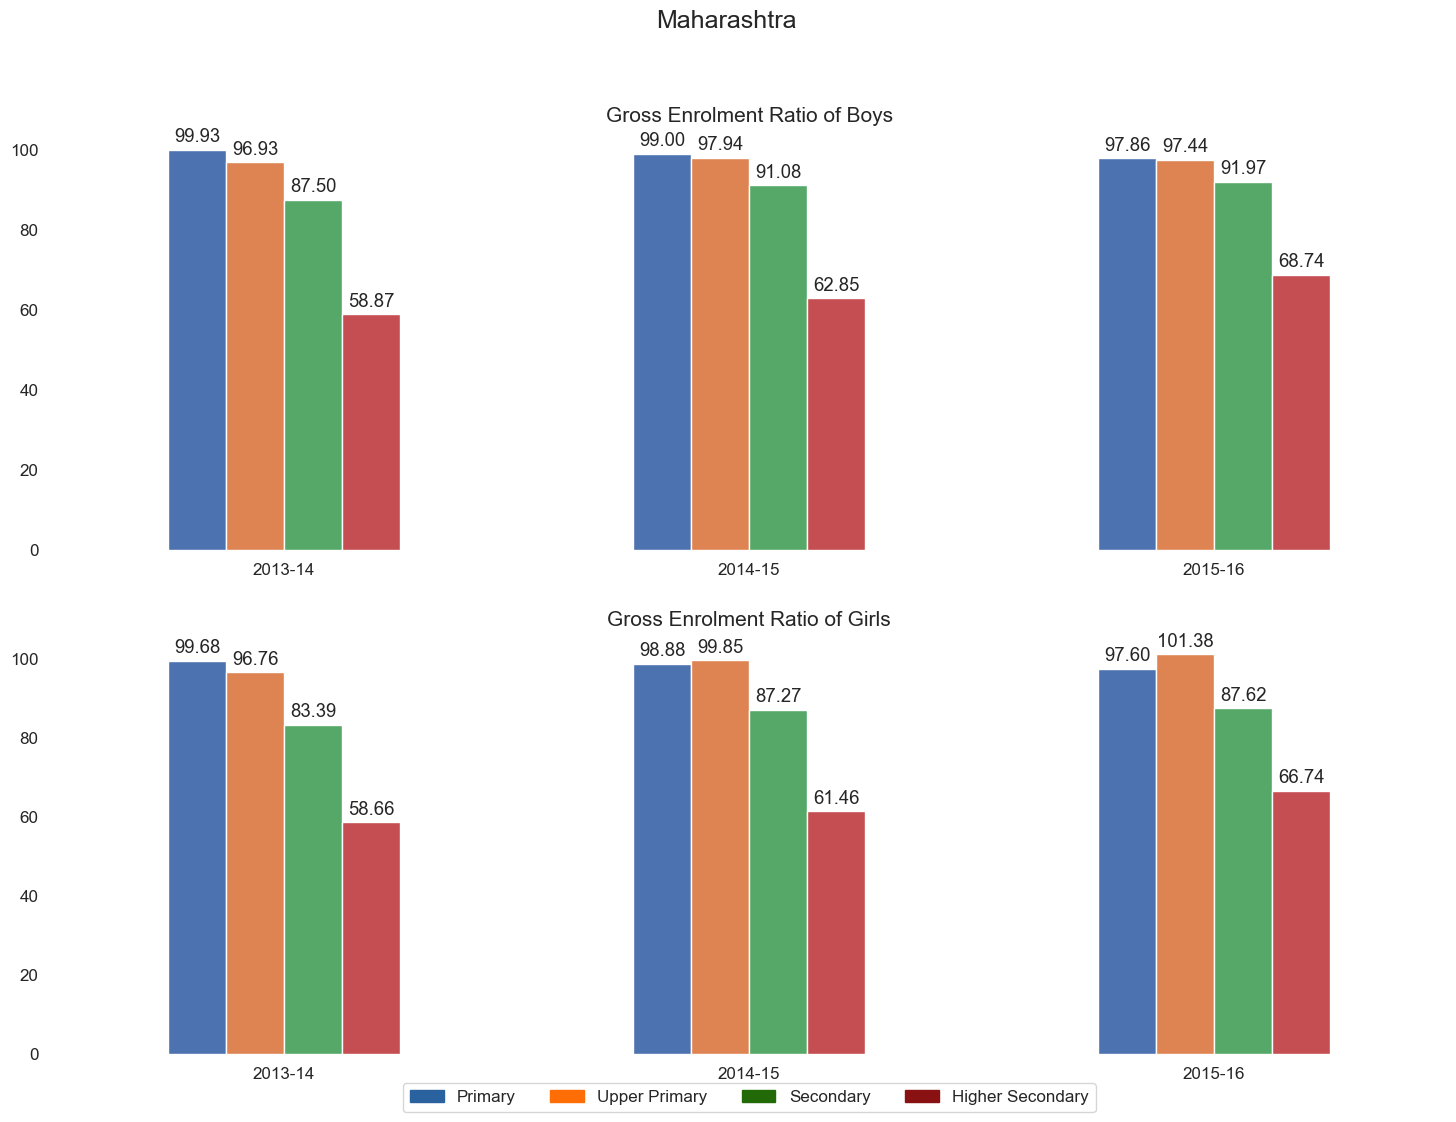

In [43]:
plot_state('Maharashtra')

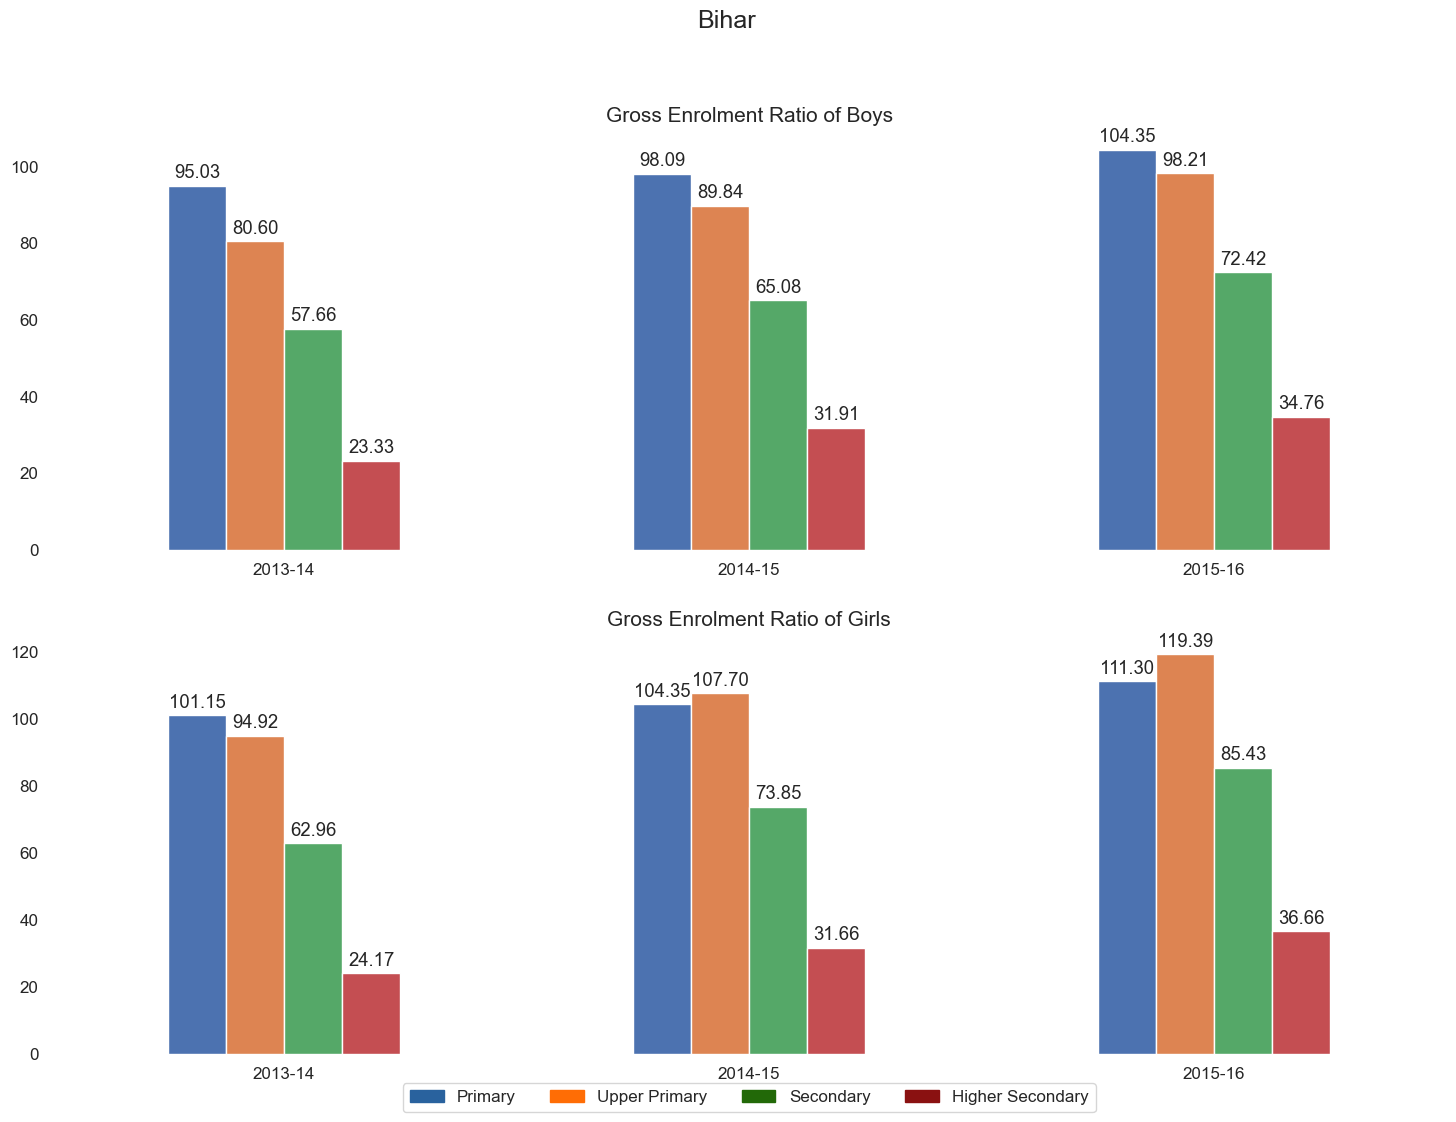

In [44]:
plot_state('Bihar')

Visualizing the data in a map

In [45]:
india.head()

,ID_0,ISO,NAME_0,ID_1,NAME_1,NL_NAME_1,VARNAME_1,TYPE_1,ENGTYPE_1,filename,filename_1,filename_2,filename_3,filename_4,geometry
0,105,IND,India,1,Andaman and Nicobar,,Andaman & Nicobar Islands|Andaman et Nicobar|I...,Union Territor,Union Territory,,,,,,"MULTIPOLYGON (((93.78773 6.85264, 93.78849 6.8..."
1,105,IND,India,2,Andhra Pradesh,,,State,State,,,,,,"MULTIPOLYGON (((80.27458 13.45958, 80.27458 13..."
2,105,IND,India,3,Arunachal Pradesh,,Agence de la Frontire du Nord-Est(French-obsol...,State,State,,,,,,"POLYGON ((96.15778 29.38310, 96.16380 29.37668..."
3,105,IND,India,4,Assam,,,State,State,,,,,,"MULTIPOLYGON (((89.87145 25.53730, 89.87118 25..."
4,105,IND,India,5,Bihar,,,State,State,,,,,,"MULTIPOLYGON (((88.10548 26.53904, 88.10505 26..."


In [46]:
india['NAME_1'].replace({
    'Andaman & Nicobar Island':'Andaman & Nicobar Islands',
    'Arunanchal Pradesh':'Arunachal Pradesh',
    'NCT of Delhi':'Delhi',
    'Jammu & Kashmir':'Jammu And Kashmir',
    'Dadara & Nagar Havelli':'Dadra & Nagar Haveli'    
},inplace=True)

df_enroll.rename(columns={
    'State_UT':'state'
},inplace=True)

india.rename(columns={
    'NAME_1':'state'
},inplace=True)

In [47]:
latest_filt = df_enroll['Year'] =='2015-16'
states_op = india.merge(df_enroll.loc[latest_filt][1:].sort_values(by='state'),on='state')

In [48]:
cols=['Primary_Boys','Primary_Girls','Primary_Total','Upper_Primary_Boys',
      'Upper_Primary_Girls','Upper_Primary_Total','Secondary_Boys','Secondary_Girls',
      'Secondary_Total','Higher_Secondary_Boys','Higher_Secondary_Girls','Higher_Secondary_Total']
states_op[cols] = states_op[cols].astype('float')

Plotting the data by gender

In [49]:
import seaborn as sns

Text(0.5, 0.98, 'Distribution of Gross Enrolment Ratio of boys across India')

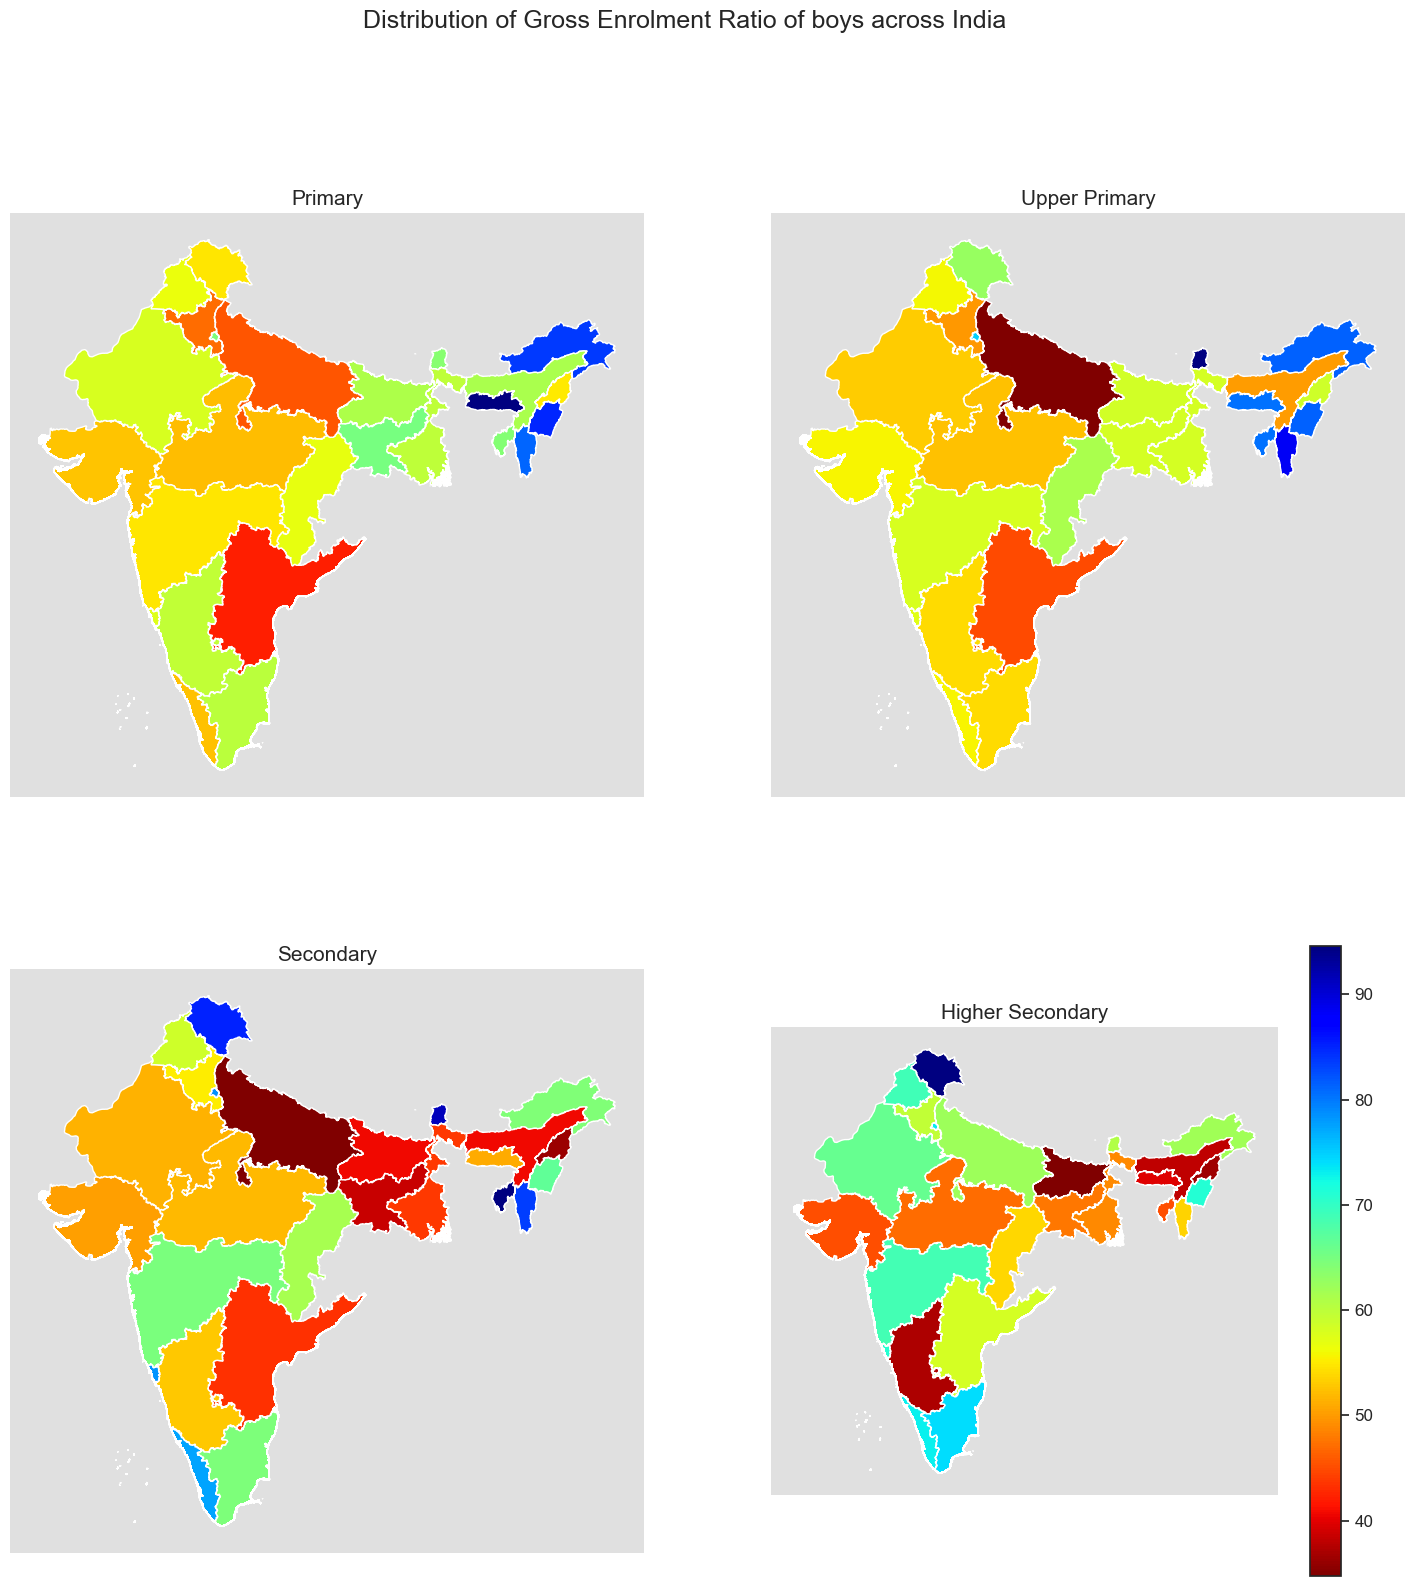

In [50]:
fig,ax = plt.subplots(2,2,figsize=(18,18))
sns.set_style('white')
states_op.plot(column='Primary_Boys',cmap='jet_r',figsize=(9,9),
                    legend=False,ax=ax[0,0])
ax[0,0].set_title('Primary',fontsize=15)
states_op.plot(column='Upper_Primary_Boys',cmap='jet_r',figsize=(9,9),
                    legend=False,ax=ax[0,1])
ax[0,1].set_title('Upper Primary',fontsize=15)
states_op.plot(column='Secondary_Boys',cmap='jet_r',figsize=(9,9),
                    legend=False,ax=ax[1,0])
ax[1,0].set_title('Secondary',fontsize=15)
states_op.plot(column='Higher_Secondary_Boys',cmap='jet_r',figsize=(9,9),
                    legend=True,ax=ax[1,1])
ax[1,1].set_title('Higher Secondary',fontsize=15)

ax[0,0].set_facecolor('#e0e0e0')
ax[0,1].set_facecolor('#e0e0e0')
ax[1,0].set_facecolor('#e0e0e0')
ax[1,1].set_facecolor('#e0e0e0')

for i in np.arange(2):
    for j in np.arange(2):
        ax[i,j].spines['top'].set_visible(False)
        ax[i,j].spines['right'].set_visible(False)
        ax[i,j].spines['left'].set_visible(False)
        ax[i,j].spines['bottom'].set_visible(False)
        for item in ax[i,j].get_xticklabels():
            item.set_visible(False)
        for item in ax[i,j].get_yticklabels():
            item.set_visible(False) 
        ax[i,j].set_xticks([]) 
        ax[i,j].set_yticks([]) 
fig.suptitle('Distribution of Gross Enrolment Ratio of boys across India', fontsize=18)



Text(0.5, 0.98, 'Distribution of Gross Enrolment Ratio of girls across India')

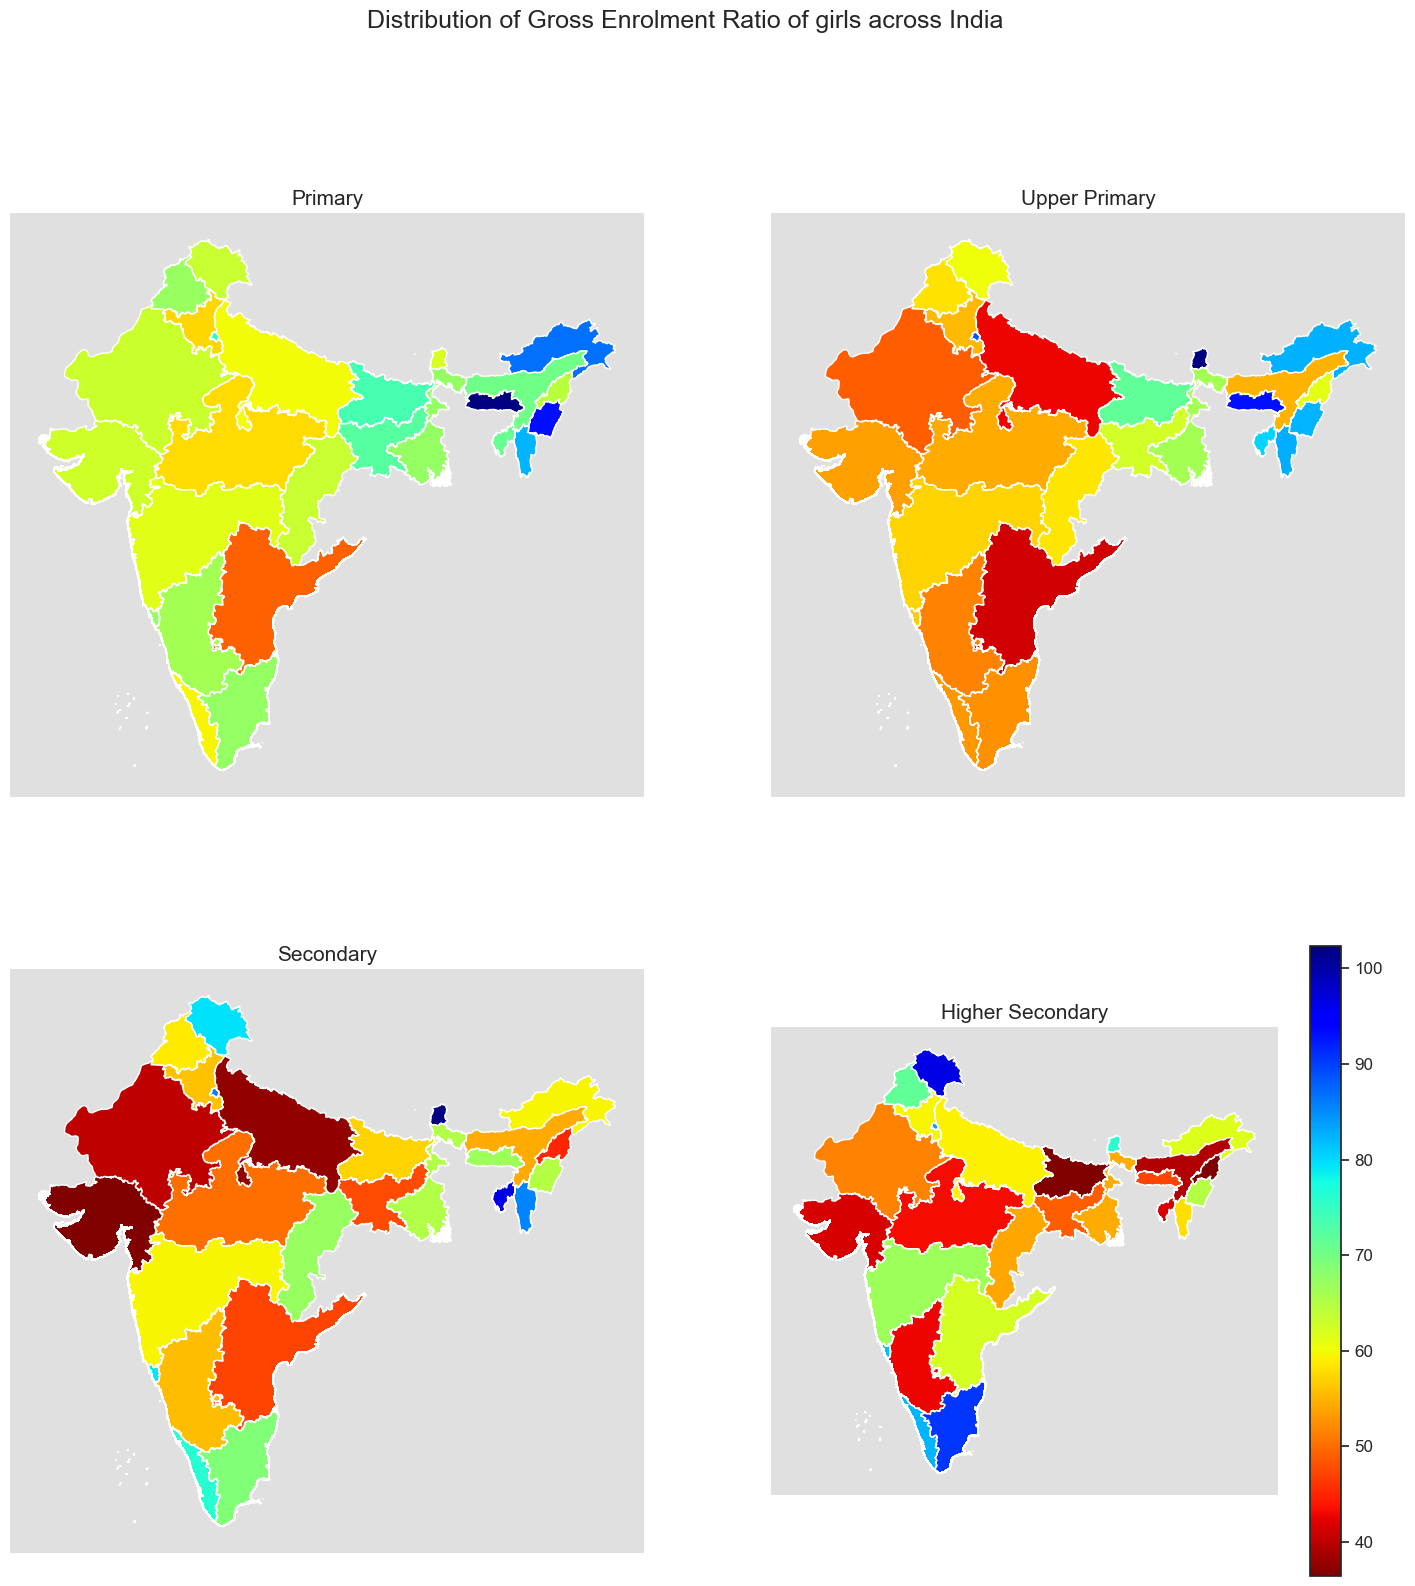

In [51]:
fig,ax = plt.subplots(2,2,figsize=(18,18))
sns.set_style('white')
states_op.plot(column='Primary_Girls',cmap='jet_r',figsize=(9,9),
                    legend=False,ax=ax[0,0])
ax[0,0].set_title('Primary',fontsize=15)
states_op.plot(column='Upper_Primary_Girls',cmap='jet_r',figsize=(9,9),
                    legend=False,ax=ax[0,1])
ax[0,1].set_title('Upper Primary',fontsize=15)
states_op.plot(column='Secondary_Girls',cmap='jet_r',figsize=(9,9),
                    legend=False,ax=ax[1,0])
ax[1,0].set_title('Secondary',fontsize=15)
states_op.plot(column='Higher_Secondary_Girls',cmap='jet_r',figsize=(9,9),
                    legend=True,ax=ax[1,1])
ax[1,1].set_title('Higher Secondary',fontsize=15)

ax[0,0].set_facecolor('#e0e0e0')
ax[0,1].set_facecolor('#e0e0e0')
ax[1,0].set_facecolor('#e0e0e0')
ax[1,1].set_facecolor('#e0e0e0')

for i in np.arange(2):
    for j in np.arange(2):
        ax[i,j].spines['top'].set_visible(False)
        ax[i,j].spines['right'].set_visible(False)
        ax[i,j].spines['left'].set_visible(False)
        ax[i,j].spines['bottom'].set_visible(False)
        for item in ax[i,j].get_xticklabels():
            item.set_visible(False)
        for item in ax[i,j].get_yticklabels():
            item.set_visible(False) 
        ax[i,j].set_xticks([]) 
        ax[i,j].set_yticks([]) 
fig.suptitle('Distribution of Gross Enrolment Ratio of girls across India', fontsize=18)

RESEARCH WORK

In [52]:
df_enroll["Average"] = df_total.mean(axis=1)

In [53]:
df_enroll

,state,Year,Primary_Boys,Primary_Girls,Primary_Total,Upper_Primary_Boys,Upper_Primary_Girls,Upper_Primary_Total,Secondary_Boys,Secondary_Girls,Secondary_Total,Higher_Secondary_Boys,Higher_Secondary_Girls,Higher_Secondary_Total,Average
0,Andaman & Nicobar Islands,2013-14,95.88,91.97,93.93,94.70,88.98,91.83,102.89,97.36,100.16,105.4,96.61,101.28,5.402500
20,Maharashtra,2013-14,99.93,99.68,99.81,96.93,96.76,96.69,87.50,83.39,85.58,58.87,58.66,58.77,8.195000
21,Manipur,2013-14,145.68,152.81,149.15,111.62,115.08,113.31,84.81,83.78,84.30,65.46,58.91,62.18,12.480000
22,Meghalaya,2013-14,132.89,137.89,135.35,102.24,119.99,110.97,67.09,78.61,72.80,19.56,26.41,22.94,10.132500
23,Mizoram,2013-14,127.88,123.89,125.96,119.38,118.03,118.72,105.92,107.34,106.62,57.97,61.85,59.88,7.932500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,Meghalaya,2015-16,138.75,143.12,140.90,126.00,146.20,135.89,80.73,93.94,87.27,39.77,47.03,43.35,12.465000
57,Manipur,2015-16,128.91,132.90,130.85,127.00,132.94,129.89,93.61,92.52,93.07,71.1,64.81,67.95,9.423333
56,Maharashtra,2015-16,97.86,97.60,97.74,97.44,101.38,99.24,91.97,87.62,89.95,68.74,66.74,67.81,4.220000
71,West Bengal,2015-16,103.13,104.26,103.68,97.90,112.64,105.00,74.92,92.65,83.56,48.98,54.36,51.54,10.917500


C:\Users\pc\AppData\Local\Temp\ipykernel_13936\3577794056.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="state", y="Average",palette='Purples_r',


Text(0.5, 0.98, 'States with Highest Enrollment Ratio')

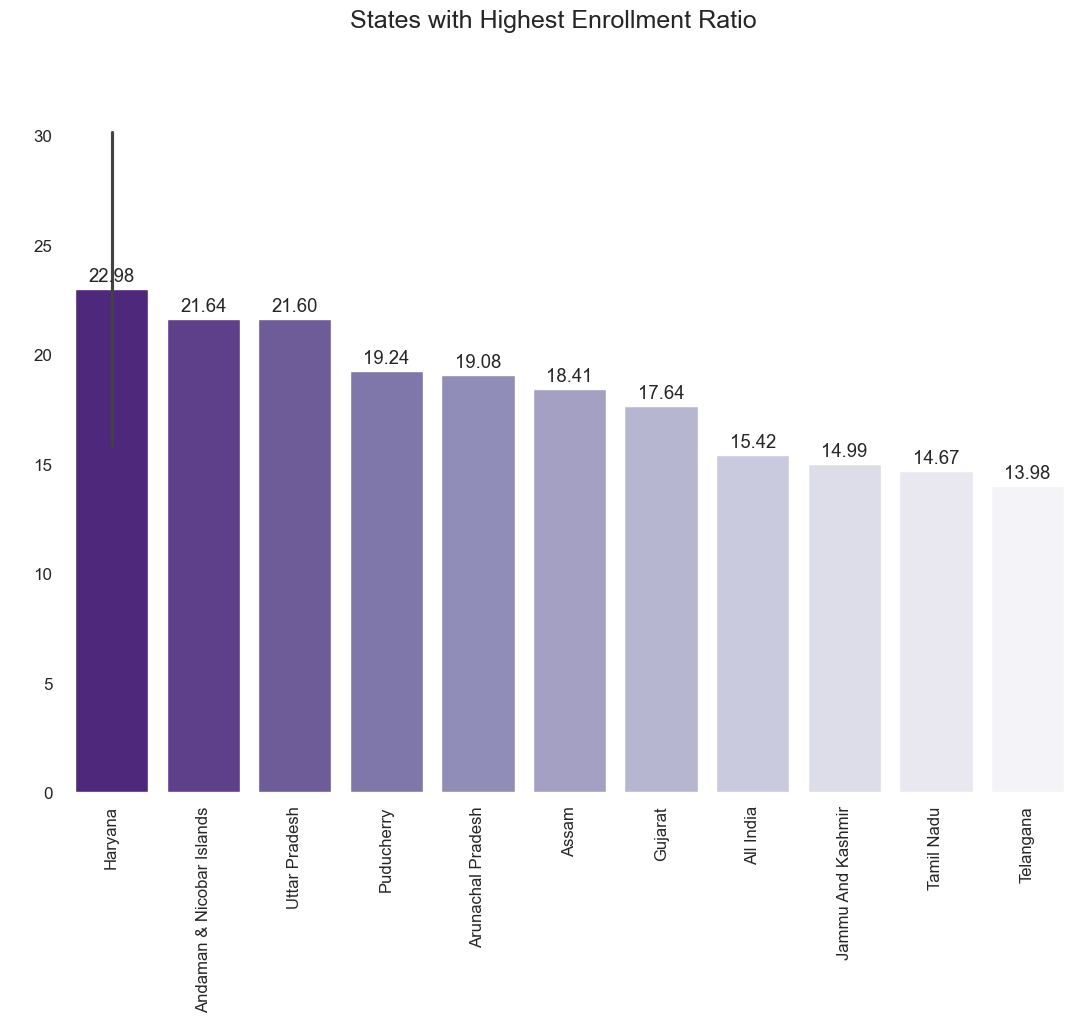

In [54]:
fig,ax = plt.subplots(figsize=(13,9))
sns.set_style("white")
ax = sns.barplot(x="state", y="Average",palette='Purples_r',
                 data=df_enroll.sort_values(by='Average',ascending=False).head(12))
sns.despine(top=True,right=True,left=True, bottom=True)


for item in ax.get_xticklabels():
    item.set_rotation(90)
    item.set_fontsize(12)
ax.set_xlabel('')
ax.set_ylabel(' ')


for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')


fig.suptitle('States with Highest Enrollment Ratio', fontsize=18)

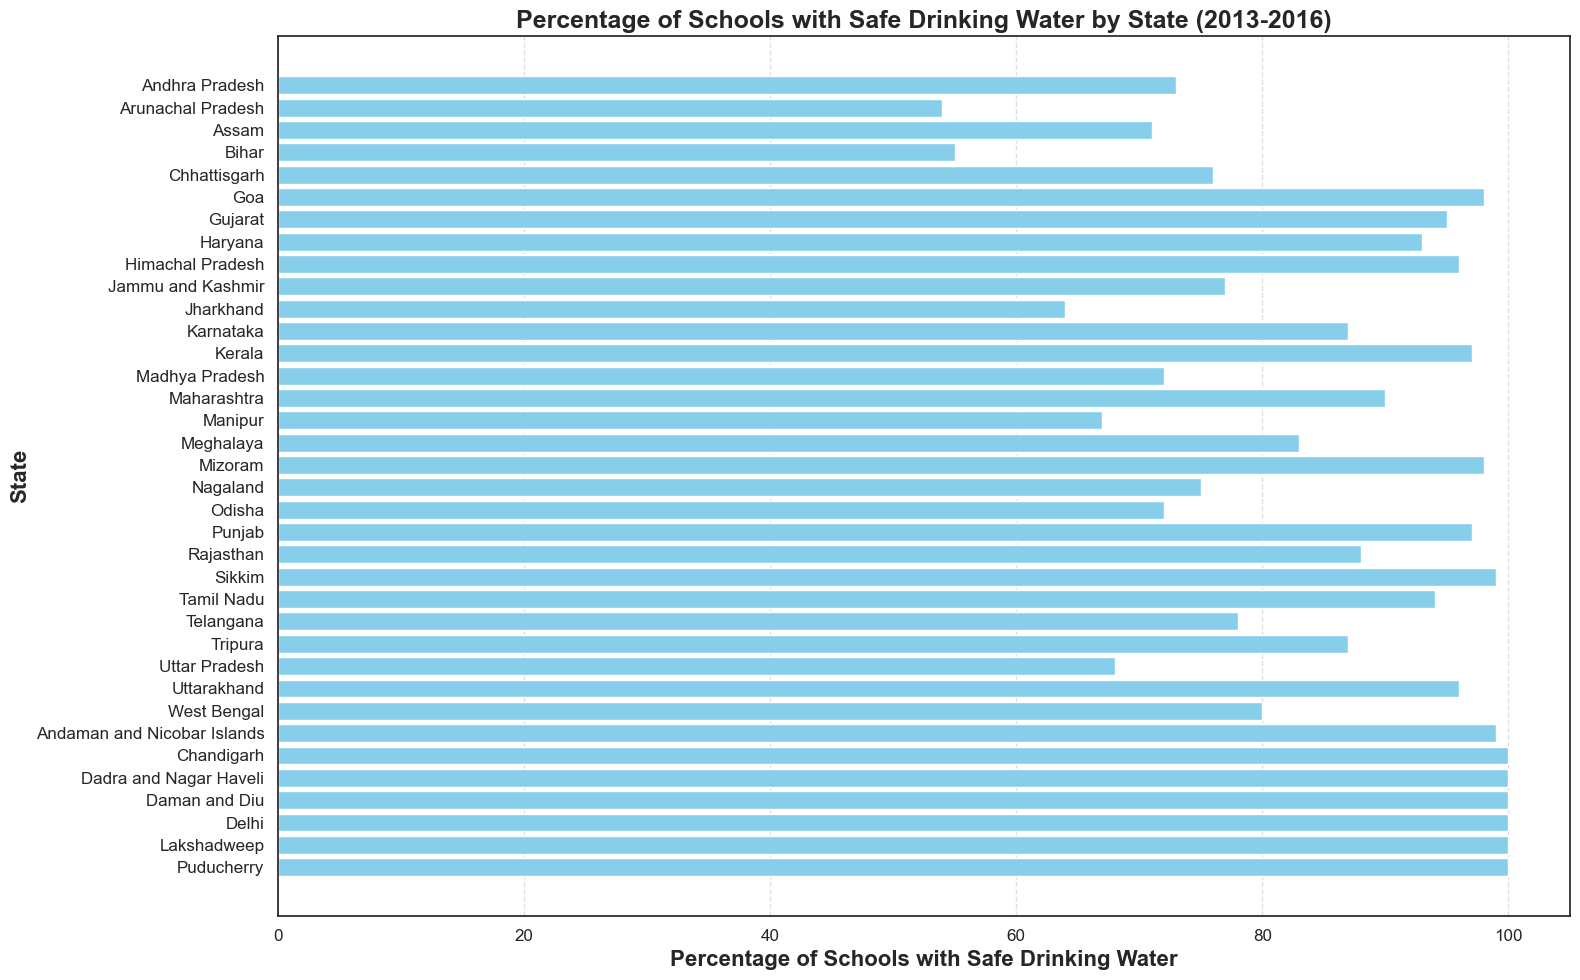

In [55]:
import matplotlib.pyplot as plt

# Data
states = [
    "Andhra Pradesh",
    "Arunachal Pradesh",
    "Assam",
    "Bihar",
    "Chhattisgarh",
    "Goa",
    "Gujarat",
    "Haryana",
    "Himachal Pradesh",
    "Jammu and Kashmir",
    "Jharkhand",
    "Karnataka",
    "Kerala",
    "Madhya Pradesh",
    "Maharashtra",
    "Manipur",
    "Meghalaya",
    "Mizoram",
    "Nagaland",
    "Odisha",
    "Punjab",
    "Rajasthan",
    "Sikkim",
    "Tamil Nadu",
    "Telangana",
    "Tripura",
    "Uttar Pradesh",
    "Uttarakhand",
    "West Bengal",
    "Andaman and Nicobar Islands",
    "Chandigarh",
    "Dadra and Nagar Haveli",
    "Daman and Diu",
    "Delhi",
    "Lakshadweep",
    "Puducherry",
]

percentages = [
    73,
    54,
    71,
    55,
    76,
    98,
    95,
    93,
    96,
    77,
    64,
    87,
    97,
    72,
    90,
    67,
    83,
    98,
    75,
    72,
    97,
    88,
    99,
    94,
    78,
    87,
    68,
    96,
    80,
    99,
    100,
    100,
    100,
    100,
    100,
    100,
]

# Create a bar chart
plt.figure(figsize=(16, 10))
plt.barh(states, percentages, color='skyblue')
plt.xlabel('Percentage of Schools with Safe Drinking Water', fontsize=16, fontweight='bold')
plt.ylabel('State', fontsize=16, fontweight='bold')
plt.title('Percentage of Schools with Safe Drinking Water by State (2013-2016)',fontsize=18,fontweight='bold')
plt.gca().invert_yaxis()  # Invert the y-axis to display the state with the highest percentage at the top
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()